In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection

In [2]:
dataset = pd.read_csv('cardio_train.csv', delimiter=";")
# dataset is a csv file divided by ";"

In [3]:
dataset.shape

(70000, 13)

In [4]:
dataset.index

RangeIndex(start=0, stop=70000, step=1)

In [5]:
dataset.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
dataset.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
dataset.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='active', ylabel='count'>

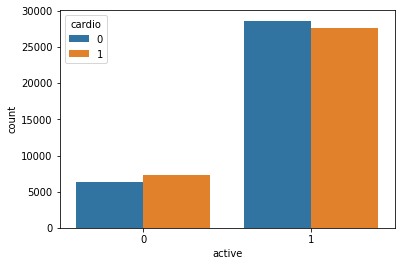

In [10]:
sns.countplot(x="active", hue="cardio", data=dataset)

<AxesSubplot:xlabel='alco', ylabel='count'>

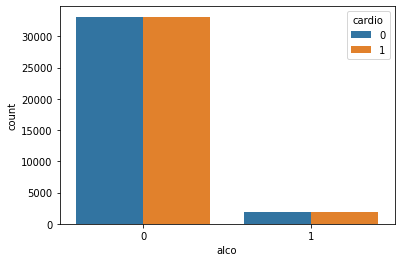

In [11]:
sns.countplot(x="alco", hue="cardio", data=dataset)

<AxesSubplot:xlabel='smoke', ylabel='count'>

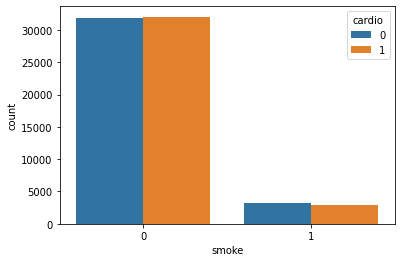

In [12]:
sns.countplot(x="smoke", hue="cardio", data=dataset)

<AxesSubplot:xlabel='gluc', ylabel='count'>

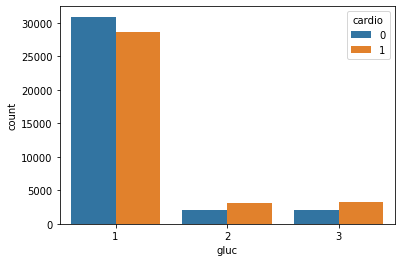

In [13]:
sns.countplot(x="gluc", hue="cardio", data=dataset)

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

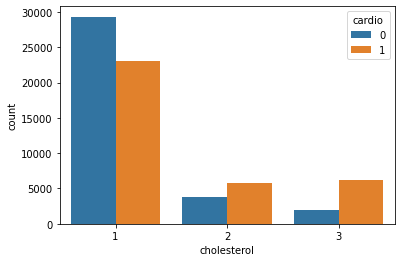

In [14]:
sns.countplot(x="cholesterol", hue="cardio", data=dataset)

<AxesSubplot:>

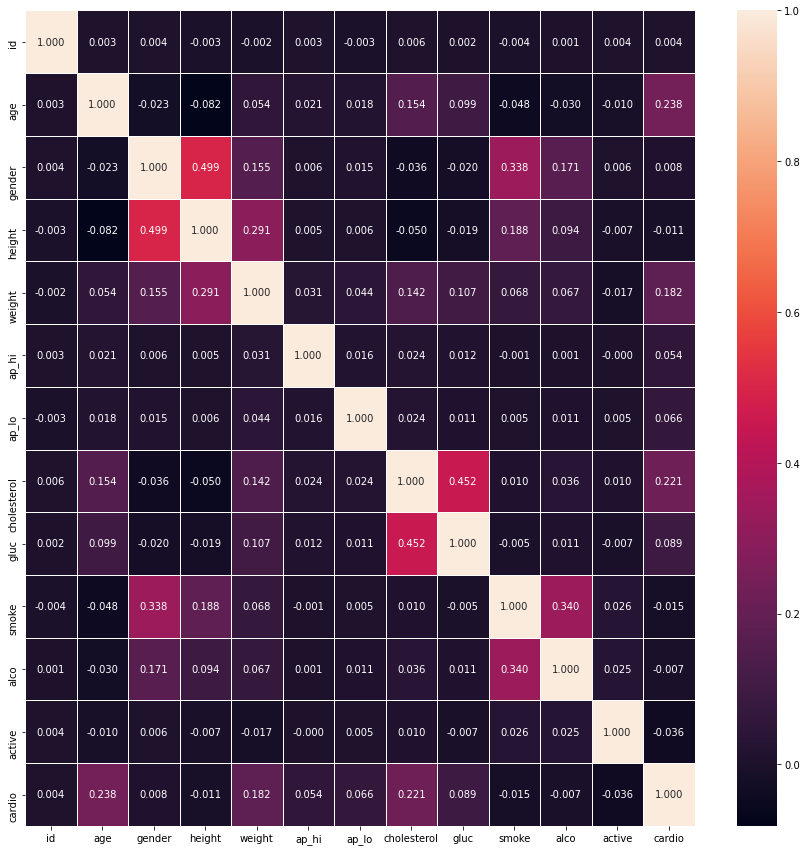

In [15]:
correlation = dataset.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [16]:
# Check for missing values
dataset.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [17]:
# Check for NaN values
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [18]:
# Check for duplicates
duplicated_records = dataset[dataset.duplicated()]
print("Duplicated Rows: ", duplicated_records.shape)

Duplicated Rows:  (0, 13)


In [19]:
# Clear duplicates
dataset.drop_duplicates(inplace=True)
dataset.head(100)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,21076,1,158,53.0,110,70,1,1,0,0,1,0
96,131,19258,2,165,65.0,110,70,1,1,0,0,1,0
97,132,18410,1,165,99.0,150,110,1,1,0,0,0,1
98,133,21860,2,170,100.0,120,80,1,1,0,0,0,1


In [20]:
dataset.count()

id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

In [21]:
# The age column were in days
dataset['age'] = round(dataset['age'] / 365, 0)
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


<AxesSubplot:xlabel='age', ylabel='weight'>

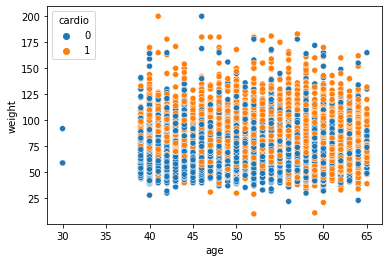

In [22]:
sns.scatterplot(x='age', y='weight', hue='cardio', data= dataset)

In [23]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='height'>

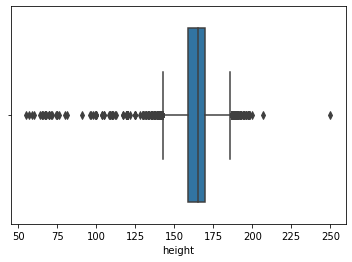

In [24]:
# Based on the data described, there seems to be abnormal data in height (max:250cm)
# Boxplot is used to identify the outlier
sns.boxplot(x=dataset['height'])

In [25]:
# Display records where height is more than 200 
dataset[dataset['height']>200]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,9223,58.0,1,250,86.0,140,100,3,1,0,0,1,1
21628,30894,52.0,2,207,78.0,100,70,1,1,0,1,1,0


In [26]:
# Remove abnormal data where height does not coorelate to the weight
dataset.drop(index=6486, inplace= True)

<AxesSubplot:xlabel='weight'>

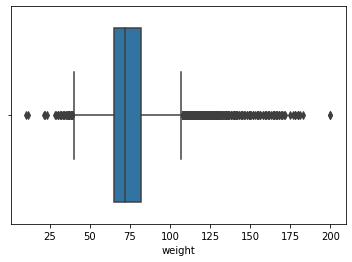

In [27]:
sns.boxplot(x=dataset['weight'])

In [28]:
dataset[dataset['weight']>175]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
435,618,46.0,1,186,200.0,130,70,1,1,0,0,0,0
2441,3438,53.0,2,177,177.0,130,90,1,1,0,0,1,1
4743,6716,47.0,2,176,180.0,140,90,1,1,0,0,1,1
20092,28683,57.0,2,165,178.0,120,80,1,1,1,1,1,0
27384,39156,42.0,1,80,178.0,140,90,3,3,0,0,1,1
36780,52564,54.0,1,161,181.0,180,1100,2,1,0,0,1,1
45378,64829,48.0,2,190,180.0,140,80,2,2,0,0,1,1
50413,71945,41.0,2,180,200.0,150,90,1,1,0,0,1,1
60592,86506,52.0,2,180,180.0,140,100,3,1,0,0,1,1
61285,87498,57.0,2,180,183.0,110,80,3,3,0,1,1,1


<AxesSubplot:xlabel='age'>

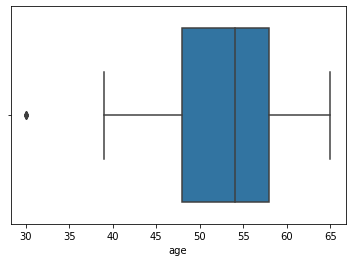

In [29]:
sns.boxplot(x=dataset['age'])

In [30]:
# Based on the age distribution, certain records have suspicious height associated
dataset[dataset['height'] < 125]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,309,60.0,2,76,55.0,120,80,1,1,0,0,1,0
3420,4838,40.0,1,100,70.0,100,70,1,1,0,0,1,0
3735,5278,48.0,1,120,70.0,120,70,1,1,0,0,1,0
3752,5306,42.0,1,120,30.0,110,70,1,1,0,0,1,0
4212,5946,44.0,1,120,80.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65302,93223,51.0,1,99,60.0,90,60,1,1,0,0,1,0
66023,94249,40.0,1,120,80.0,120,70,2,1,0,0,1,0
66479,94906,46.0,2,110,90.0,110,90,1,1,0,0,1,0
66643,95141,52.0,1,57,61.0,130,90,1,1,0,0,1,1


In [31]:
dataset = dataset[dataset['height'] >= 125]

In [32]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000
mean,49971.568057,53.340099,1.349554,164.436263,74.196071,128.826110,96.638975,1.367004,1.226556,0.088154,0.053796,0.803825,0.499728
std,28850.194915,6.764653,0.476832,7.865565,14.366283,154.105892,188.558662,0.680321,0.572360,0.283520,0.225617,0.397105,0.500004
min,0.000000,30.000000,1.000000,125.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25009.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74882.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,207.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='weight', ylabel='height'>

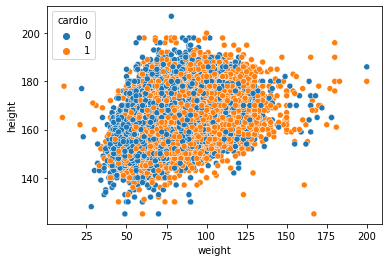

In [33]:
sns.scatterplot(data=dataset, x="weight",y="height", hue=dataset["cardio"])

In [34]:
# Remove records with abnormal weight outliers
dataset[dataset['weight'] < 25]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
26806,38312,64.0,1,157,23.0,110,80,1,1,0,0,1,0
29488,42156,56.0,2,177,22.0,120,80,1,1,1,1,1,0
33817,48318,59.0,2,178,11.0,130,90,1,1,0,0,1,1
57858,82567,52.0,2,165,10.0,180,1100,2,2,0,0,1,1
60188,85931,60.0,1,162,21.0,120,80,2,1,0,0,1,1


In [35]:
dataset.drop(index=list(dataset[dataset['weight']<25].index),inplace=True)

In [36]:
dataset[dataset['weight'] > 175] # might possible remove them

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
435,618,46.0,1,186,200.0,130,70,1,1,0,0,0,0
2441,3438,53.0,2,177,177.0,130,90,1,1,0,0,1,1
4743,6716,47.0,2,176,180.0,140,90,1,1,0,0,1,1
20092,28683,57.0,2,165,178.0,120,80,1,1,1,1,1,0
36780,52564,54.0,1,161,181.0,180,1100,2,1,0,0,1,1
45378,64829,48.0,2,190,180.0,140,80,2,2,0,0,1,1
50413,71945,41.0,2,180,200.0,150,90,1,1,0,0,1,1
60592,86506,52.0,2,180,180.0,140,100,3,1,0,0,1,1
61285,87498,57.0,2,180,183.0,110,80,3,3,0,1,1,1
61362,87612,46.0,2,196,180.0,130,80,3,1,0,0,1,1


In [37]:
dataset.drop('id', inplace=True, axis=1)
dataset.head()
# Dropping ID number column

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [38]:
dataset.count()

age            69907
gender         69907
height         69907
weight         69907
ap_hi          69907
ap_lo          69907
cholesterol    69907
gluc           69907
smoke          69907
alco           69907
active         69907
cardio         69907
dtype: int64

In [39]:
dataset = dataset[dataset['ap_hi'] < 250]
dataset = dataset[dataset['ap_lo'] < 200]

In [40]:
# Both systolic and diastolic blood pressure cannot be negative, hence negative values are removed
dataset = dataset[dataset['ap_hi'] > 0]
dataset = dataset[dataset['ap_lo'] > 0]

In [41]:
dataset[dataset['ap_hi'] > 80]
print("{}".format(dataset[dataset['ap_hi'] > 80].count()))

age            68599
gender         68599
height         68599
weight         68599
ap_hi          68599
ap_lo          68599
cholesterol    68599
gluc           68599
smoke          68599
alco           68599
active         68599
cardio         68599
dtype: int64


<AxesSubplot:xlabel='ap_hi'>

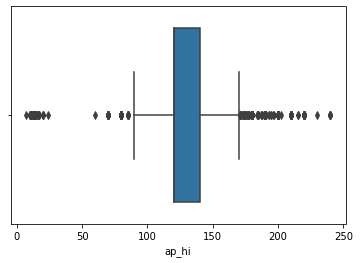

In [42]:
sns.boxplot(x=dataset["ap_hi"])

<AxesSubplot:xlabel='ap_lo'>

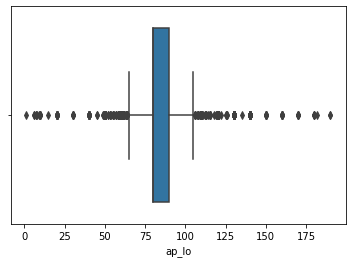

In [43]:
sns.boxplot(x=dataset["ap_lo"])

In [44]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000
mean,53.326095,1.348652,164.436961,74.112185,126.331509,81.352919,1.364531,1.225985,0.087874,0.053604,0.803350,0.494934
std,6.767041,0.476547,7.855868,14.292916,17.689983,9.801749,0.678772,0.571923,0.283114,0.225236,0.397468,0.499978
min,30.000000,1.000000,125.000000,28.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,207.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Feature engineering
# bmi = weight /(height / 100) ^ 2
dataset["BMI"] = dataset["weight"] / (dataset["height"]/100)**2

In [46]:
# column renaming, cardio is the target variable, hence, it is not renamed
dataset = dataset.rename(columns={'age':'Age', 'gender':'Gender', 'height':'Height', 'weight':'Weight', 
                                  'ap_hi':'Systolic', 'ap_lo':'Diastolic', 'cholesterol':'Cholesterol', 
                                  'gluc':'Glucose','smoke':'Smoke','alco':'Alcohol', 'active':'Physical Active'})

In [47]:
dataset.describe()

,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical Active,cardio,BMI
count,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000,68894.000000
mean,53.326095,1.348652,164.436961,74.112185,126.331509,81.352919,1.364531,1.225985,0.087874,0.053604,0.803350,0.494934,27.443116
std,6.767041,0.476547,7.855868,14.292916,17.689983,9.801749,0.678772,0.571923,0.283114,0.225236,0.397468,0.499978,5.214647
min,30.000000,1.000000,125.000000,28.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.917581
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213
max,65.000000,2.000000,207.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,106.880000


In [48]:
X = dataset.drop(['cardio'], axis=1)
Y = dataset['cardio']

In [49]:
#from sklearn.preprocessing import StandardScaler

In [50]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# 80% of the dataset is used for training and the remaining 20 is for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 2)

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
penalty = ['none','l2']
C=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
solver=['lbfgs','saga']

param_grid = dict(penalty=penalty,C=C,solver=solver)
model = LogisticRegression()

grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=5)

In [54]:
grid_result = grid.fit(X_train, y_train)

/home/pop-user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.726408418760773
Best Params:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [56]:
model = LogisticRegression(C=0.01,penalty='l2',solver='lbfgs')

In [57]:
model.fit(X_train,y_train)

/home/pop-user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [58]:
# Prediction Score
acc_log = round(model.score(X_train,y_train) * 100, 2)

In [59]:
acc_log

72.66

In [60]:
pred = model.predict(X_test)

In [61]:
print(pred)

[1 0 0 ... 1 1 1]


In [62]:
from sklearn import metrics
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6989
           1       0.74      0.67      0.70      6790

    accuracy                           0.72     13779
   macro avg       0.72      0.72      0.72     13779
weighted avg       0.72      0.72      0.72     13779



In [63]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, pred)

In [64]:
cnf_matrix

array([[5411, 1578],
       [2267, 4523]])

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.7209521735975034
Precision: 0.7413538764137027
Recall: 0.6661266568483063


<AxesSubplot:>

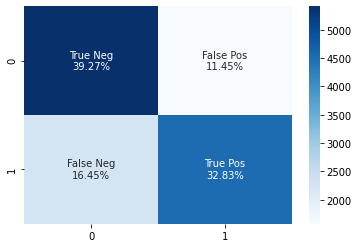

In [66]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [68]:
prob = model.predict_proba(X_test)

In [69]:
prob = prob[:, 1]

In [70]:
lr_auc = roc_auc_score(y_test,prob)

In [71]:
print("ROC AUC=%.3f"%(lr_auc))

ROC AUC=0.787


In [72]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test,pred,squared=False)
print(rmse)

0.5282497765285817


In [73]:
# Artificial Neural Network 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import InputLayer

def create_clf(n_hidden,kernel,units):
    clf = Sequential()
    clf.add(InputLayer(input_shape=12))
    for layer in range(n_hidden):
        clf.add(Dense(units, kernel_initializer=kernel, activation='relu'))
    clf.add(Dropout(rate=0.3))
    clf.add(Dense(1, kernel_initializer=kernel, activation='sigmoid'))
    clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return clf

seed = 1
np.random.seed(seed)

parameters = {
    'batch_size' : [32,64,128],
    'nb_epoch': [50,100],
    'n_hidden':[0,1,2,3],
    'kernel':['random_uniform'],
    'units':[8,12,24,30]
}

clf = KerasClassifier(build_fn=create_clf) #RandoomizedSearchCV for hyperparameter tuning the model

In [75]:
random_search = RandomizedSearchCV(estimator=clf,param_distributions=parameters,n_iter=20,n_jobs=-1,cv=5)
random_search.fit(X,Y)

/home/pop-user/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


2153/2153 [==============================] - 1s 477us/step - loss: 0.6189 - accuracy: 0.6545


RandomizedSearchCV(cv=5,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f142de47ac0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'batch_size': [32, 64, 128],
                                        'kernel': ['random_uniform'],
                                        'n_hidden': [0, 1, 2, 3],
                                        'nb_epoch': [50, 100],
                                        'units': [8, 12, 24, 30]})

In [76]:
print('RandomizedSearch Best score',random_search.best_score_)
print('RandomizedSearch Best params',random_search.best_params_)
print('RandomizedSearch execution time',random_search.refit_time_)

RandomizedSearch Best score 0.7176821947097778
RandomizedSearch Best params {'units': 30, 'nb_epoch': 100, 'n_hidden': 3, 'kernel': 'random_uniform', 'batch_size': 32}
RandomizedSearch execution time 1.3558971881866455


In [77]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=12))
nn_model.add(Dense(30, kernel_initializer='random_uniform', activation='relu'))
nn_model.add(Dense(30, kernel_initializer='random_uniform', activation='relu'))
nn_model.add(Dense(30, kernel_initializer='random_uniform', activation='relu'))
nn_model.add(Dropout(rate=0.3))
nn_model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError(name='rmse')])

In [78]:
hist= nn_model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
1378/1378 [==============================] - 1s 725us/step - loss: 0.6292 - accuracy: 0.6418 - rmse: 0.4683 - val_loss: 0.5771 - val_accuracy: 0.7144 - val_rmse: 0.4419
Epoch 2/50
1378/1378 [==============================] - 1s 577us/step - loss: 0.5830 - accuracy: 0.7087 - rmse: 0.4444 - val_loss: 0.5640 - val_accuracy: 0.7218 - val_rmse: 0.4353
Epoch 3/50
1378/1378 [==============================] - 1s 566us/step - loss: 0.5681 - accuracy: 0.7204 - rmse: 0.4374 - val_loss: 0.5688 - val_accuracy: 0.7170 - val_rmse: 0.4382
Epoch 4/50
1378/1378 [==============================] - 1s 570us/step - loss: 0.5657 - accuracy: 0.7211 - rmse: 0.4359 - val_loss: 0.5595 - val_accuracy: 0.7218 - val_rmse: 0.4338
Epoch 5/50
1378/1378 [==============================] - 1s 565us/step - loss: 0.5649 - accuracy: 0.7199 - rmse: 0.4358 - val_loss: 0.5912 - val_accuracy: 0.7072 - val_rmse: 0.4473
Epoch 6/50
1378/1378 [==============================] - 1s 556us/step - loss: 0.5636 - accuracy: 0.7

In [79]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


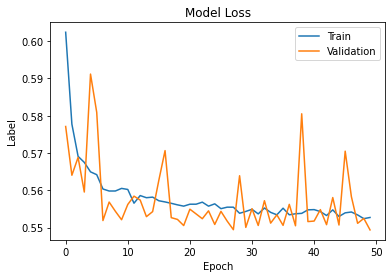

In [80]:
# Visualize the training loss and the validation loss
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Label")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

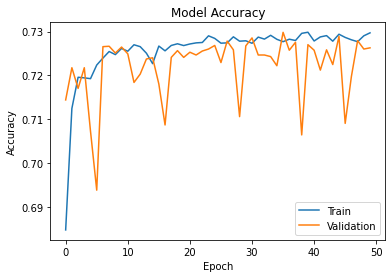

In [81]:
# Visualize the training accuracy and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'], loc='lower right')
plt.show()

In [82]:
nn_loss, nn_accuracy, nn_rmse = nn_model.evaluate(X,Y)

2153/2153 [==============================] - 1s 311us/step - loss: 0.5459 - accuracy: 0.7307 - rmse: 0.4272


In [83]:
print("Accuracy:",nn_accuracy)
print("\n Loss:",nn_loss)
print("\n Root Mean Squared Error:",nn_rmse)

Accuracy: 0.7307312488555908

 Loss: 0.5458937287330627

 Root Mean Squared Error: 0.42715948820114136


In [84]:
# Prediction
nn_prediction = nn_model.predict(X_test)

In [85]:
nn_prediction

array([[0.7431578 ],
       [0.05546799],
       [0.18935946],
       ...,
       [0.8736548 ],
       [0.9114271 ],
       [0.5465794 ]], dtype=float32)

In [86]:
nn_pred = [1 if y >= 0.5 else 0 for y in nn_prediction]

In [87]:
nn_pred

[1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [88]:
nn_rmse = mean_squared_error(y_test,nn_pred,squared=False)
print(nn_rmse)
# RMSE Score for validation

0.5198016671125907


In [89]:
from sklearn import metrics
print(metrics.classification_report(y_test,nn_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6989
           1       0.75      0.69      0.71      6790

    accuracy                           0.73     13779
   macro avg       0.73      0.73      0.73     13779
weighted avg       0.73      0.73      0.73     13779



In [90]:
# Confusion Matrix
nn_cnf_matrix = metrics.confusion_matrix(y_test, nn_pred)

In [91]:
nn_cnf_matrix

array([[5393, 1596],
       [2127, 4663]])

In [92]:
print("Accuracy:",metrics.accuracy_score(y_test, nn_pred))
print("Precision:",metrics.precision_score(y_test, nn_pred))
print("Recall:",metrics.recall_score(y_test, nn_pred))

Accuracy: 0.7298062268669715
Precision: 0.7450071896469085
Recall: 0.6867452135493373


<AxesSubplot:>

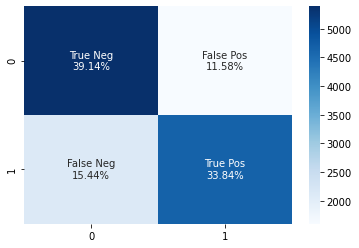

In [93]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ["{0:.2%}".format(value) for value in nn_cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nn_cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [95]:
y_pred_model = nn_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_model)

In [96]:
model_auc = auc(fpr_keras,tpr_keras)
model_auc

0.7968724996212226

In [97]:
#Export Models
import pickle

#export logistic regression model
lr_filename = 'finalized_lr_model.sav'
pickle.dump(model,open(lr_filename,'wb'))
print("Saved logistic regression model into lr_model.sav")

nn_model.save("model.h5")
print("Saved neural network model into model.h5")

Saved logistic regression model into lr_model.sav
Saved neural network model into model.h5
